In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv(r"D:\Ineuron\DataSet\train.csv")

In [10]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
import numpy as np
df["Cabin_null"]= np.where(df.Cabin.isnull(), 1, 0)

In [7]:
#Impute Nan with mean/median/mode
df. Age.isnull().sum()

177

In [13]:
def impute_nan(df, variable, median):
    df[variable+"median"] = df[variable].fillna(median)

In [20]:
median = df.Age.median()

In [15]:
impute_nan(df, 'Age', median)

In [18]:
df.Agemedian.isnull().sum()

0

In [8]:
#Impute Nan with some random values
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [17]:
df['Age'][5]

nan

In [19]:
#Random Imputation
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable + "_random"] = df[variable]
    #Draw a sample of size missing value
    random_sample = df[variable].dropna().sample(df['Age'].isnull().sum(), random_state = 0)
    #merge this sample with original data frame as per index
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + "_random"] = random_sample

In [21]:
impute_nan(df, 'Age', median)

In [22]:
df["Age_random"].isnull().sum()

0

In [23]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0,28.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.0,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.0,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.0,14.0


In [9]:
df1 = pd.read_csv(r"D:\Ineuron\DataSet\train.csv", usecols = ["Sex"])

In [10]:
df1.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [12]:
#One hot encoding
pd.get_dummies(df1)

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [14]:
pd.get_dummies(df1, drop_first = True)

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [14]:
df1 = pd.read_csv(r"D:\Ineuron\DataSet\train.csv", usecols = ['Pclass', 'Fare'])

In [15]:
df1.head()

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500


In [16]:
df1.isnull().sum()

Pclass    0
Fare      0
dtype: int64

In [17]:
df1.head()

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500


In [10]:
#Standardisation
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [12]:
 data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [20]:
scaler.fit_transform(df1)

array([[ 0.82737724, -0.50244517],
       [-1.56610693,  0.78684529],
       [ 0.82737724, -0.48885426],
       ...,
       [ 0.82737724, -0.17626324],
       [-1.56610693, -0.04438104],
       [ 0.82737724, -0.49237783]])

In [22]:
df2 = pd.DataFrame(scaler.fit_transform(df1))

In [26]:
df2.head()

,0,1
0,0.827377,-0.502445
1,-1.566107,0.786845
2,0.827377,-0.488854
3,-1.566107,0.420730
4,0.827377,-0.486337


<AxesSubplot:ylabel='Frequency'>

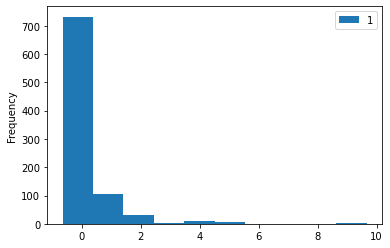

In [32]:
df2[[1]].plot.hist()

In [34]:
df2.mean()
df2.var()

0    1.001124
1    1.001124
dtype: float64

In [35]:
#MinMax Scal
from sklearn.preprocessing import MinMaxScaler

In [36]:
Min_Max = MinMaxScaler()

In [38]:
df_minmax = pd.DataFrame(Min_Max.fit_transform(df1))

In [39]:
df_minmax

,0,1
0,1.0,0.014151
1,0.0,0.139136
2,1.0,0.015469
3,0.0,0.103644
4,1.0,0.015713
...,...,...
886,0.5,0.025374
887,0.0,0.058556
888,1.0,0.045771
889,0.0,0.058556


In [25]:
df['Age']= df['Age'].fillna(df['Age'].median())

In [28]:
df['Age'].isnull().sum()

0

In [29]:
## QQ Plot
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline
import pylab

In [30]:
def plot_data(df, feature):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist = 'norm', plot = pylab)

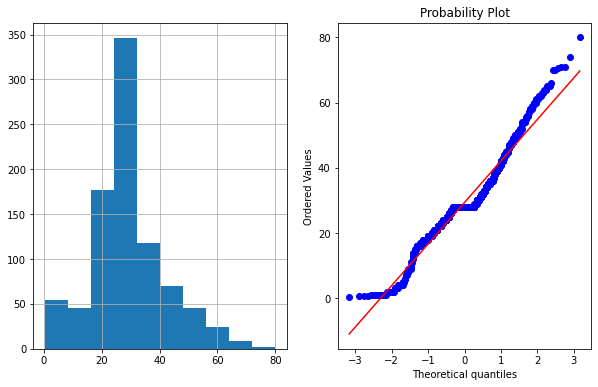

In [31]:
plot_data(df, 'Age')

In [59]:
 Age_New = np.array(df.Age.head(40))

In [60]:
type(Age_New)

numpy.ndarray

In [61]:
Age_New.hist()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

((array([-2.11583547, -1.7314906 , -1.50271646, -1.33321868, -1.19520249,
         -1.07683093, -0.97189321, -0.87669641, -0.78885043, -0.70670905,
         -0.62908229, -0.55507545, -0.48399287, -0.41527745, -0.34847074,
         -0.28318561, -0.2190868 , -0.15587657, -0.09328369, -0.03105452,
          0.03105452,  0.09328369,  0.15587657,  0.2190868 ,  0.28318561,
          0.34847074,  0.41527745,  0.48399287,  0.55507545,  0.62908229,
          0.70670905,  0.78885043,  0.87669641,  0.97189321,  1.07683093,
          1.19520249,  1.33321868,  1.50271646,  1.7314906 ,  2.11583547]),
  array([ 2.,  2.,  4.,  8., 14., 14., 14., 15., 18., 19., 20., 21., 22.,
         26., 27., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28.,
         31., 34., 35., 35., 35., 38., 38., 39., 40., 42., 54., 55., 58.,
         66.])),
 (14.426155440837197, 28.350000000000005, 0.9754596954154295))

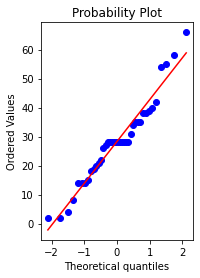

In [62]:
    plt.subplot(1,2,2)
    stat.probplot(Age_New, dist = 'norm', plot = pylab)

In [63]:
Age_New

array([22., 38., 26., 35., 35., 28., 54.,  2., 27., 14.,  4., 58., 20.,
       39., 14., 55.,  2., 28., 31., 28., 35., 34., 15., 28.,  8., 38.,
       28., 19., 28., 28., 40., 28., 28., 66., 28., 42., 28., 21., 18.,
       14.])

In [58]:
type(df.Age)

pandas.core.series.Series